In [1]:
import sys
sys.path.append("..")
from src.data.GetData import get_data
get_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
df_treino = pd.read_csv('../src/data/train.csv')
df_treino.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test = pd.read_csv('../src/data/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_treino.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [6]:
df_treino.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
(df_treino.isnull().sum()/df_treino.shape[0])

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [8]:
df_treino.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [9]:
df_treino

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [10]:
df_treino['HomePlanet'].mode()

0    Earth
Name: HomePlanet, dtype: object

In [11]:
df_treino["Transported"] = df_treino.Transported.astype('int')

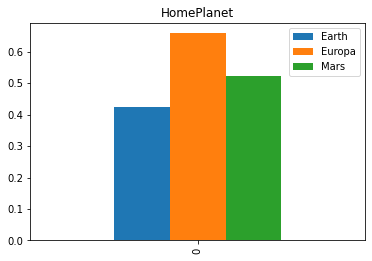

In [12]:
coluna = 0
df_aux = df_treino.groupby(df_treino.columns[coluna]).Transported.mean().reset_index().transpose()
df_aux = df_aux.rename(columns=df_aux.iloc[0]).drop(df_treino.columns[coluna],axis=0).reset_index(drop=True)
df_aux.plot(kind='bar')
plt.title(df_treino.columns[coluna])
plt.show()

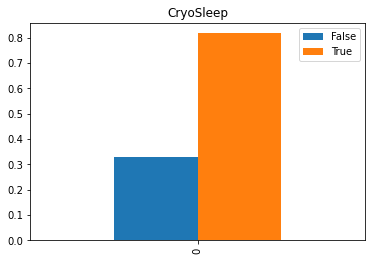

In [13]:
coluna = 1
df_aux = df_treino.groupby(df_treino.columns[coluna]).Transported.mean().reset_index().transpose()
df_aux = df_aux.rename(columns=df_aux.iloc[0]).drop(df_treino.columns[coluna],axis=0).reset_index(drop=True)
df_aux.plot(kind='bar')
plt.title(df_treino.columns[coluna])
plt.show()

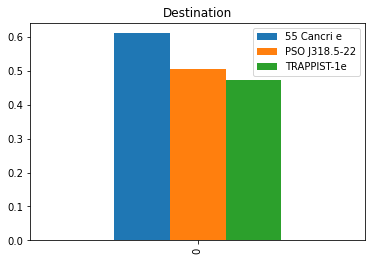

In [14]:
coluna = 3
df_aux = df_treino.groupby(df_treino.columns[coluna]).Transported.mean().reset_index().transpose()
df_aux = df_aux.rename(columns=df_aux.iloc[0]).drop(df_treino.columns[coluna],axis=0).reset_index(drop=True)
df_aux.plot(kind='bar')
plt.title(df_treino.columns[coluna])
plt.show()

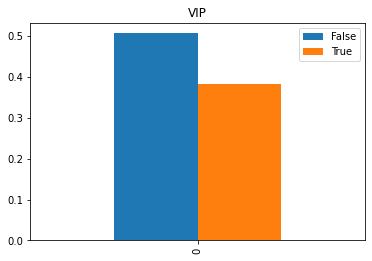

In [15]:
coluna = 5
df_aux = df_treino.groupby(df_treino.columns[coluna]).Transported.mean().reset_index().transpose()
df_aux = df_aux.rename(columns=df_aux.iloc[0]).drop(df_treino.columns[coluna],axis=0).reset_index(drop=True)
df_aux.plot(kind='bar')
plt.title(df_treino.columns[coluna])
plt.show()

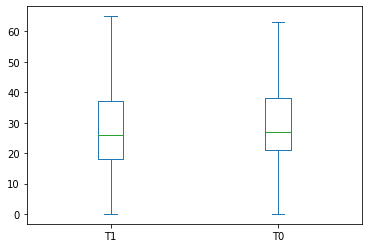

In [16]:
coluna = 8
df_aux = pd.DataFrame()
df_aux['T1'] = df_treino.loc[df_treino['Transported']==1]['Age'].reset_index(drop = True)
df_aux['T0'] = df_treino.loc[df_treino['Transported']==0]['Age'].reset_index(drop = True)
df_aux.plot(kind = 'box', showfliers=False)
plt.show()

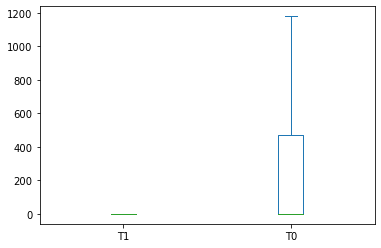

In [17]:
df_aux = pd.DataFrame()
df_aux['T1'] = df_treino.loc[df_treino['Transported']==1]['RoomService'].reset_index(drop = True)
df_aux['T0'] = df_treino.loc[df_treino['Transported']==0]['RoomService'].reset_index(drop = True)
df_aux.plot(kind = 'box', showfliers=False)
plt.show()

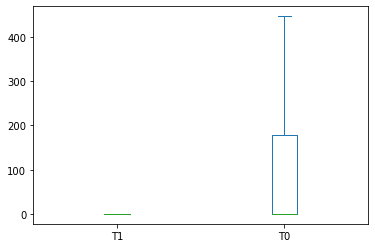

In [18]:
df_aux = pd.DataFrame()
df_aux['T1'] = df_treino.loc[df_treino['Transported']==1]['FoodCourt'].reset_index(drop = True)
df_aux['T0'] = df_treino.loc[df_treino['Transported']==0]['FoodCourt'].reset_index(drop = True)
df_aux.plot(kind = 'box', showfliers=False)
plt.show()

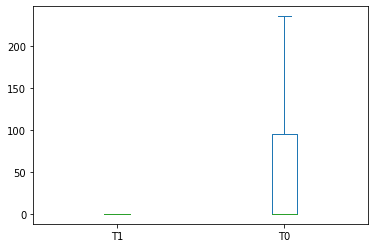

In [19]:
df_aux = pd.DataFrame()
df_aux['T1'] = df_treino.loc[df_treino['Transported']==1]['ShoppingMall'].reset_index(drop = True)
df_aux['T0'] = df_treino.loc[df_treino['Transported']==0]['ShoppingMall'].reset_index(drop = True)
df_aux.plot(kind = 'box', showfliers=False)
plt.show()

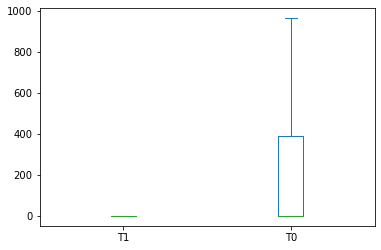

In [20]:
df_aux = pd.DataFrame()
df_aux['T1'] = df_treino.loc[df_treino['Transported']==1]['VRDeck'].reset_index(drop = True)
df_aux['T0'] = df_treino.loc[df_treino['Transported']==0]['VRDeck'].reset_index(drop = True)
df_aux.plot(kind = 'box', showfliers=False)
plt.show()

In [21]:
df_treino.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [22]:
# Criando variável soma de gastos
df_treino['GTotal'] = df_treino.FoodCourt + df_treino.ShoppingMall + df_treino.RoomService + df_treino.Spa + df_treino.VRDeck

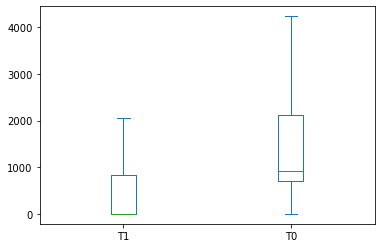

In [23]:
df_aux = pd.DataFrame()
df_aux['T1'] = df_treino.loc[df_treino['Transported']==1]['GTotal'].reset_index(drop = True)
df_aux['T0'] = df_treino.loc[df_treino['Transported']==0]['GTotal'].reset_index(drop = True)
df_aux.plot(kind = 'box', showfliers=False)
plt.show()

In [24]:
# Remoção das variáveis menos relevantes
#  Remoção da Idade, distribuição muito parecida
#  Remoção dos gastos sepecíficos, será substituida por um gasto total
# Remoção da Cabine
df_limpa_treino = df_treino.drop(['Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
df_limpa_treino

,HomePlanet,CryoSleep,Destination,VIP,Transported,GTotal
0,Europa,False,TRAPPIST-1e,False,0,0.0
1,Earth,False,TRAPPIST-1e,False,1,736.0
2,Europa,False,TRAPPIST-1e,True,0,10383.0
3,Europa,False,TRAPPIST-1e,False,0,5176.0
4,Earth,False,TRAPPIST-1e,False,1,1091.0
...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,0,8536.0
8689,Earth,True,PSO J318.5-22,False,0,0.0
8690,Earth,False,TRAPPIST-1e,False,1,1873.0
8691,Europa,False,55 Cancri e,False,0,4637.0


In [25]:
df_limpa_treino.isnull().sum()/df_limpa_treino.shape[0]

HomePlanet     0.023122
CryoSleep      0.024963
Destination    0.020936
VIP            0.023352
Transported    0.000000
GTotal         0.104452
dtype: float64

In [26]:
# Como 10% dos faltantes estãp no gasto total, vou assumir que gastos faltantes são iguais a zero
num_imputer = SimpleImputer(strategy='constant', fill_value=0)
cat_imputer = SimpleImputer(strategy='most_frequent')
num_cols = ['GTotal']
cat_cols = ['HomePlanet', 'VIP', 'CryoSleep', 'Destination']
num_imputer.fit(df_limpa_treino[num_cols])
cat_imputer.fit(df_limpa_treino[cat_cols])


SimpleImputer(strategy='most_frequent')

In [27]:
df_limpa_treino[num_cols] = num_imputer.transform(df_limpa_treino[num_cols])
df_limpa_treino[cat_cols] = cat_imputer.transform(df_limpa_treino[cat_cols])

In [28]:
df_limpa_treino.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Transported    0
GTotal         0
dtype: int64

In [29]:
encoder = OneHotEncoder(drop = 'first')
encoder.fit(df_limpa_treino[cat_cols])
encoder.transform(df_limpa_treino[cat_cols]).toarray()

array([[1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1.]])

In [33]:
encoder.get_feature_names_out()

array(['HomePlanet_Europa', 'HomePlanet_Mars', 'VIP_True',
       'CryoSleep_True', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'], dtype=object)

In [34]:
df_limpa_treino[encoder.get_feature_names_out()] = encoder.transform(df_limpa_treino[cat_cols]).toarray()

In [35]:
df_limpa_treino

,HomePlanet,CryoSleep,Destination,VIP,Transported,GTotal,HomePlanet_Europa,HomePlanet_Mars,VIP_True,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,Europa,False,TRAPPIST-1e,False,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Earth,False,TRAPPIST-1e,False,1,736.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Europa,False,TRAPPIST-1e,True,0,10383.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Europa,False,TRAPPIST-1e,False,0,5176.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Earth,False,TRAPPIST-1e,False,1,1091.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,0,8536.0,1.0,0.0,1.0,0.0,0.0,0.0
8689,Earth,True,PSO J318.5-22,False,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8690,Earth,False,TRAPPIST-1e,False,1,1873.0,0.0,0.0,0.0,0.0,0.0,1.0
8691,Europa,False,55 Cancri e,False,0,4637.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
features = num_cols+list(encoder.get_feature_names_out())
features

['GTotal',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'VIP_True',
 'CryoSleep_True',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e']

In [37]:
X = df_limpa_treino[features]
y = df_limpa_treino['Transported']

In [47]:
skf = StratifiedKFold(n_splits=5)
model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10)

In [48]:
train_score = 0
test_score = 0
i=0
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_score += f1_score(y_train,model.predict(X_train))
    test_score += f1_score(y_test, model.predict(X_test))
    i += 1
print('Treino:', train_score/i)
print('Teste;', test_score/i)   

Treino: 0.7242050901321526
Teste; 0.6944071456798182


In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [50]:
train_score = 0
test_score = 0
i=0
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_score += f1_score(y_train,model.predict(X_train))
    test_score += f1_score(y_test, model.predict(X_test))
    i += 1
print('Treino:', train_score/i)
print('Teste;', test_score/i)

Treino: 0.6884107265144725
Teste; 0.6872767935247371
